In [18]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
from image_functions import *

The first step is to load a sample image to the environment.

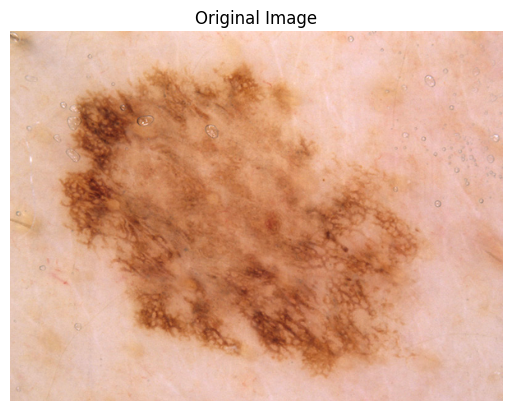

In [19]:
im = cv.imread('images/ISIC_0024328.jpg')
plt.axis('off')
plt.title('Original Image')
plt.imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
plt.show()

Then we set it to greyscale using a weighted method.

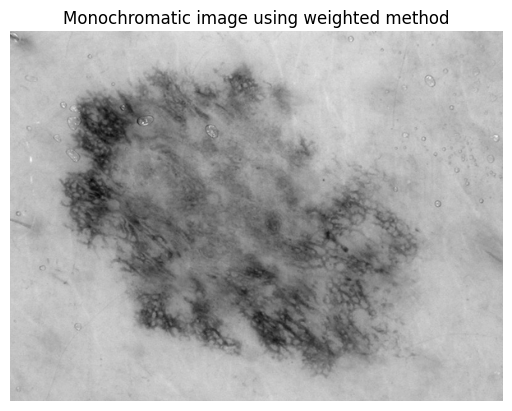

In [20]:
im = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
plt.axis('off')
plt.title('Monochromatic image using weighted method')
plt.imshow(im, cmap='gray')
plt.show()

Inpainting using black hat helps us to get rid of hair and other noise, that may affect the result of the analysis.

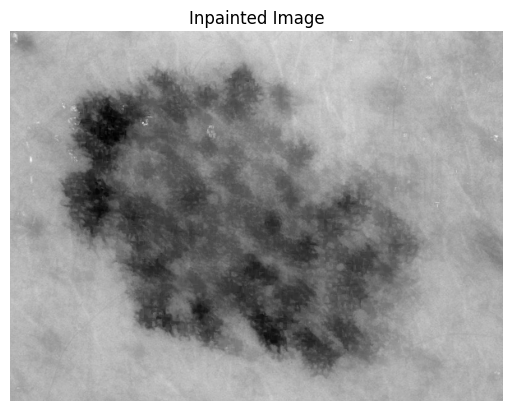

In [21]:
grayScale = im.copy()
kernel = cv.getStructuringElement(1, (17, 17))
blackhat = cv.morphologyEx(grayScale, cv.MORPH_BLACKHAT, kernel)
ret, thresh = cv.threshold(blackhat, 10, 255, cv.THRESH_BINARY)
im = cv.inpaint(im, thresh, 1, cv.INPAINT_NS)

plt.axis('off')
plt.title('Inpainted Image')
plt.imshow(im, cmap='gray')
plt.show()

The mask of a lesion is being obtained and the histogram is equalised to use the full range of shades.

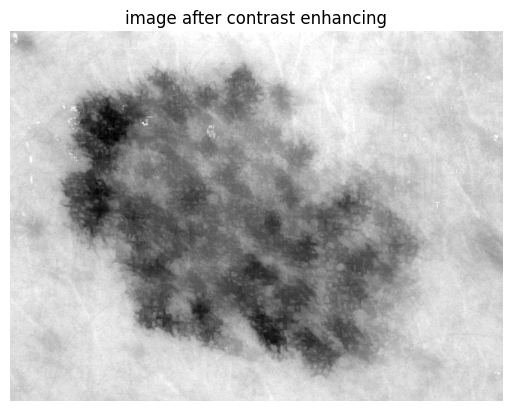

In [22]:
inner_mask, discard_mask = masking(im, 0.05, 0.05)
im_m = (255 - im) * inner_mask
im = fix_contrast(im, im_m)

plt.imshow(im, cmap='gray')
plt.title('image after contrast enhancing')
plt.axis('off')
plt.show()

Using our implementation of an otsu based binarisation we obtain a mask of a lesion.

In [23]:
im = 255 - im

hist_f = cv.calcHist([im], channels=[0], mask=im, histSize=[256], ranges=[0, 256])
hist_f = hist_f.T
thresh_f = otsu_based_binarisation(hist_f)
img_b = np.uint8(im > thresh_f)

plt.imshow(img_b, cmap='gray')
plt.axis('off')
plt.title('Mask of the lession')
plt.show()


NameError: name 'otsu_based_binarisation' is not defined

We use Laplace transformation to detect the edges of mask. It will be later used to fix the shape of the mask.

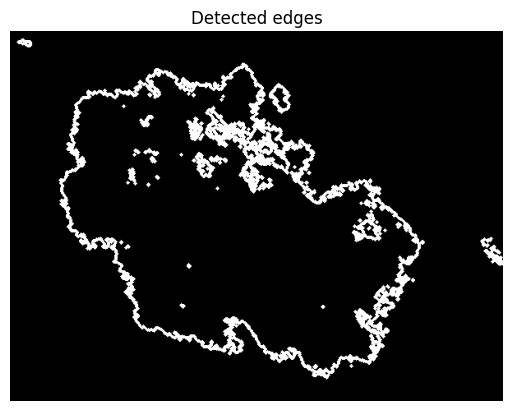

In [16]:
img_lap = ndimage.laplace(img_b)
img_lap = ndimage.binary_dilation(img_lap)
img_b[img_lap] = 0

plt.imshow(img_lap, cmap='gray')
plt.axis('off')
plt.title('Detected edges')
plt.show()


Using detected edges the mask is denoised - unconnected parts are being joined, or discarded based on their relative position. After this step image is ready for further analysis.

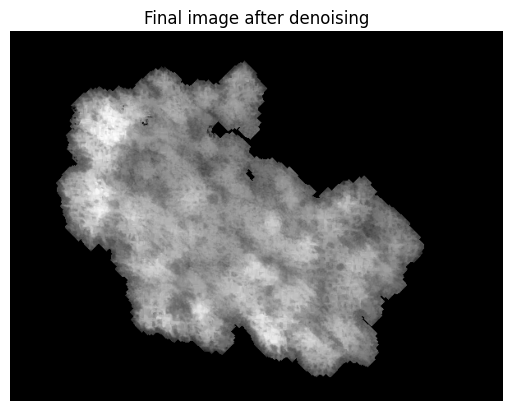

In [17]:
im_m, _, _ = denoising(im, img_b, discard_mask)
plt.imshow(im_m, cmap='gray')
plt.axis('off')
plt.title('Final image after denoising')
plt.show()